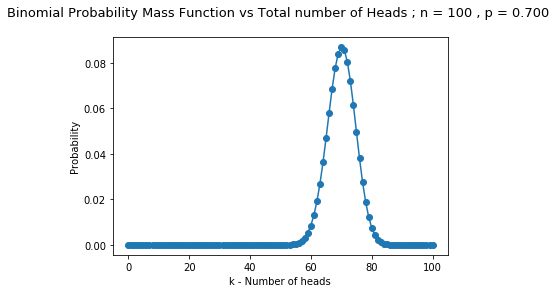

In [143]:
# inverse transformation method, Smirnov transform, golden rule
# is a basic method for pseudo-random number sampling

# probability integral transform

# A) for the binomial distribution

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

num = 100 # number of coins tossed
prob = 0.7 # probability of heads
k = np.arange(0, num+1) # total number of heads

# Probability Mass Function f(k) = Prob(X = k)
# Discrete version of probability density function (pdf) 
binomialPmf = binom.pmf(k, num, prob)

plt.plot(k, binomialPmf, 'o-')
plt.title("Binomial Probability Mass Function vs Total number of Heads ; n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("k - Number of heads")
plt.ylabel("Probability")
plt.show()


69.9716
4.516661761007386


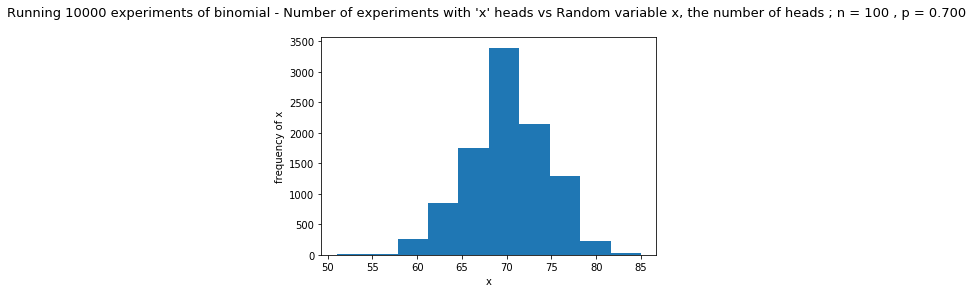

In [144]:
sim = 10000 # number of simulations
binNo = 10

binomial = binom.rvs(n = num, p = prob, size = sim) # an array of the results of 'sim' no of experiments

print(np.mean(binomial))
print(np.std(binomial, ddof = 1)) # Bessel's correction, i.e. the use of n − 1 for the sample variance 

plt.hist(binomial, bins = binNo)
plt.title("Running %i experiments of binomial - Number of experiments with 'x' heads vs Random variable x, the number of heads ; n = %i , p = %.3f \n" % (sim, num, prob), fontsize = 13)
plt.xlabel("x") # the random variable
plt.ylabel("frequency of x")
plt.show()


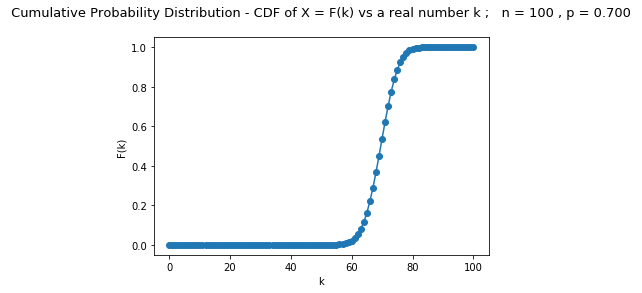

In [145]:
# The CDF of the binomial distribution
# F(k) is the (limiting) fraction of samples that lie below k OR how often do we see rv take on values below k? 
Cprob = binom.cdf(k, num, prob)
plt.plot(k, Cprob, 'o-')
plt.title(" Cumulative Probability Distribution - CDF of X = F(k) vs a real number k ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("k") # the random variable
plt.ylabel("F(k)")
plt.show()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


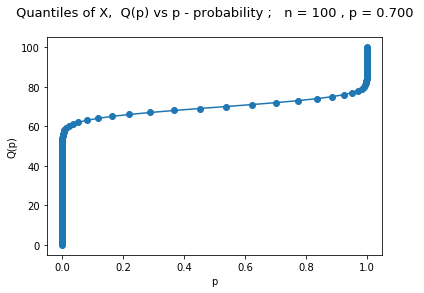

In [146]:
# F(k) or F_X(k) = Prob(X ≤ k) = int_{-infty}^{k} pdfX(t) dt = p
# F(k) = p or F-1(p) = k || NOTE that p belongs to [0,1]
# Q(p) = k The Quantile function
invC = binom.ppf(Cprob, num, prob) # percent point function
print(invC) # Q(p) returns that random variable value 'k' such that Prob(X ≤ k) = p

plt.plot(Cprob, invC, 'o-')
plt.title(" Quantiles of X,  Q(p) vs p - probability ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("p") # the random variable
plt.ylabel("Q(p)")
plt.show()

# Note how Q(0.2) = 2 since F(2) = 0.2


In [151]:
# Now Inverse transform sampling says that I can turn y ~ U(0,1) into x ~ f(x)
# if I apply the transform F-1(y) = Q(y) = x

# Since binomial is discrete, 
uniform = np.random.uniform(0,1,sim)
#print(uniform)
#print(invC)
#print(Cprob)

# find cumulative probability p such that F(k-1) < y ≤ F(k) = p
def find_nearest(array, value):
    # Array is collection of cumulative probabilities - F
    # value is y and array[k] = F(k)
    k = (np.abs(array - value)).argmin()
    if(array[k-1]<value and value<=array[k]):
        return k
    # value is closest to F(k) but is greater that it
    elif(array[k]<value and value <=array[k+1]):
        return k+1
    else:
        return 0 # value < array[0]
    
x = []
for y in uniform:
    x.append(find_nearest(Cprob,y))
#print(x)

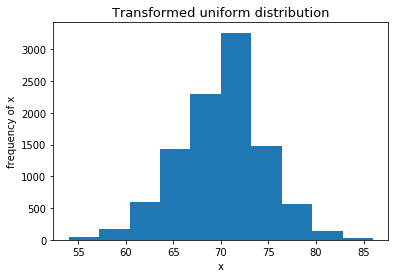

In [152]:
plt.hist(x, bins = binNo)
plt.title("Transformed uniform distribution", fontsize = 13)
plt.xlabel("x") # the random variable
plt.ylabel("frequency of x")
plt.show()

# and thus we get a binomial
